In [65]:
import requests
import io
import base64
from PIL import Image
import matplotlib.pyplot as plt


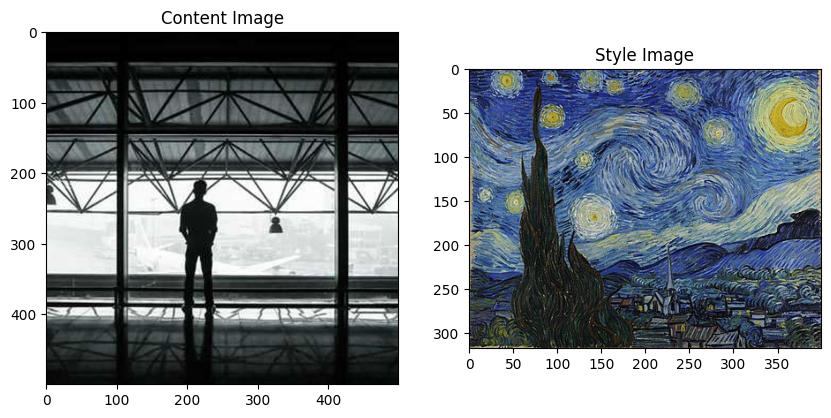

In [75]:
content_img = requests.get("https://picsum.photos/500/500").content
style_img = requests.get("https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg/400px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg").content

files = [
    ('content_img', ('content.jpg', content_img, 'image/jpeg')),
    ('style_img', ('style.jpg', style_img, 'image/jpeg'))
]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(Image.open(io.BytesIO(content_img)))
ax1.set_title("Content Image")
ax2.imshow(Image.open(io.BytesIO(style_img)))
ax2.set_title("Style Image")
plt.show()

In [76]:
response = requests.post("http://localhost:8000/transfer", files=files)
response.json()

{'message': 'Images transferred successfully!',
 'result_image': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAEAAQADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDzjcGWUeVlTyQGwD6VJZ3BVnVdqZ46jj+tQTIIyWWXIbjBT+tLAjMVxcYORgbeOteukm7s5X6mvZ25hO6KQOsg+YBMZ/zzU8UCAruRW3

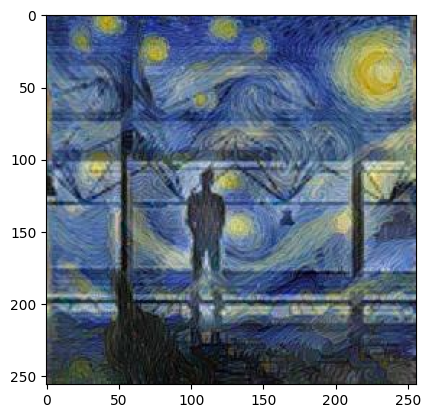

In [77]:
image = Image.open(io.BytesIO(base64.b64decode(response.json()['result_image'])))
plt.imshow(image)
plt.show()